## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
working_directory_path = '/content/drive/MyDrive/Colab Notebooks/ capstone project/Play Store App Review Analysis/'
pdf = pd.read_csv(working_directory_path +  'Play Store Data.csv')
rdf = pd.read_csv(working_directory_path +  'User Reviews.csv')
 

In [4]:
#shape of pdf and rdf  
pdf.shape , rdf.shape

((10841, 13), (64295, 5))

In [5]:
pdf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Play Store App Data

In [ ]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Play store data has 13 columns out of which 5 columns contain null values and those columns are:Rating,Type,Content rating,Current Ver,Android Ver.

In [ ]:
pdf.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pdf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
pdf.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Checking for the missing values in each column

In [ ]:
missing_values = pd.DataFrame(pdf.isnull().sum()).reset_index().rename(columns={"index":"Column Name",0:"Number of null values"})

In [ ]:
missing_values

,Column Name,Number of null values
0,App,0
1,Category,0
2,Rating,1474
3,Reviews,0
4,Size,0
5,Installs,0
6,Type,1
7,Price,0
8,Content Rating,1
9,Genres,0


# removing duplicate values

In [ ]:
# generate count statistics of duplicate entries
if len(pdf[pdf.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(pdf[pdf.duplicated()]))
    print(pdf[pdf.duplicated(keep=False)].sort_values(by=list(pdf.columns)).head())
else:
    print("No duplicated entries found")

No. of duplicated entries:  483
                             App            Category  ...  Current Ver   Android Ver
1393       10 Best Foods for You  HEALTH_AND_FITNESS  ...          1.9  2.3.3 and up
1407       10 Best Foods for You  HEALTH_AND_FITNESS  ...          1.9  2.3.3 and up
2322  1800 Contacts - Lens Store             MEDICAL  ...        7.4.1    5.0 and up
2543  1800 Contacts - Lens Store             MEDICAL  ...        7.4.1    5.0 and up
2256  2017 EMRA Antibiotic Guide             MEDICAL  ...        1.0.5  4.0.3 and up

[5 rows x 13 columns]


In [ ]:
#dropping duplicate rows in play store data (pdf)
pdf.drop_duplicates(inplace = True) 

In [ ]:
# generate count statistics of duplicate entries
if len(pdf[pdf.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(pdf[pdf.duplicated()]))
    print(pdf[pdf.duplicated(keep=False)].sort_values(by=list(pdf.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [ ]:
#new shape of the dataframe
pdf.shape

(10358, 13)

# Checking if there are multiple rows with the same app

Total rows are 10841 but we have only 9660 unique apps.Hence there must be some rows with the same app name.
Now one app with the same name is distinguashable from the other one only in the following features:Size,Price,Current Version,Android Ver.
So we need to drop those rows with same apps which have these same features.

In [ ]:
# dropping rows having 
pdf.drop_duplicates(subset = {'App','Size','Price','Current Ver','Android Ver'}, inplace = True)

In [ ]:
pdf.shape

(9686, 13)

# copy of pdf to a new dataframe df

In [ ]:
#copy of pdf to df
df = pdf.reset_index().copy()

#droping earlier additional index from df
df.drop('index', axis = 1, inplace = True)

In [ ]:
df.shape

(9686, 13)

# **Data Cleaning**

a. play store data

b. review data


* Observing values in each column
*   Replacing weird values in each column by nan values
*   Then replace nan values in each column by appropriate values

# a. **Play Store Data**

**1. Category**

In [ ]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

in categories, '1.9' a weird name can be observed

In [ ]:
#accessing the category '1.9'
df[df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9325,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


as in this category we can observe that values are suffled between columns, 

reviews(3.0M)   -    size

size(1000+)     -    installs

installs(free)  -    type

type(0)         -    price

price(everyone) -    content rating

content rating(nan) - genres

genres(February 11, 2018	) - last_updated

last updated(1.0.19) - current ver

current ver(4.0 and up ) - android version

android ver (Nan) - category

category(1.9) - rating

rating(19.0) - reviews


observation : 
as we can see values are shifted to the previous column from its actual column so 
values in each column  need to be shifted in successive next column




In [ ]:
#shifting the column values of the row having shuffled values to the just next column
df[df['Rating'] == 19.0] =  df[df['Rating'] == 19.0].shift(periods=1, freq=None, axis=1)
  

In [ ]:
# column values of the particular row got shifted to the successive next column 
df[df['Rating'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9325,NaN,Life Made WI-Fi Touchscreen Photo Frame,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


as we can observe that app name is also got shifted to Category which is not resulting a proper row so we are interchanging the value of columns App and Category

In [ ]:
#interchanging the app and category column in the partcular row 
df.loc[9325,['App' ,'Category']] = df.loc[9325,['Category','App']].values


here we got an appropriate column whose column values are logically matching with the values and properties of values in the other corresponding columns of diff categories 

In [ ]:
# here  we got the appropriate column values corresponding to the particual row no. 9990
df[df['Rating'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9325,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


we can place this app in PHOTOGRAPHY as by observing the name of the app

In [ ]:
# after observing the app name in the category assigned as nan concludes that its category can be the PHOTOGRAPHY 
# replacing nan by PHOTOGRAPHY
df['Category'] = df['Category'].replace(np.nan , 'PHOTOGRAPHY')

this is our final row of after all operations to make it compatible with remaining data

In [ ]:
df[df['Rating'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9325,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


*number of categories in dataframe in now 33 as nan category actually belongs to PHOTOGRAPHY*

In [ ]:
# now total categories in df
len(df['Category'].unique())

33

**2.Rating**

In [ ]:
#unique values in rating
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

as rating values can be converted into float object 

In [ ]:
# converting rating object type to float 
df['Rating'] = df['Rating'].astype(float)

In [ ]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9686 non-null   object 
 1   Category        9686 non-null   object 
 2   Rating          8222 non-null   float64
 3   Reviews         9686 non-null   object 
 4   Size            9686 non-null   object 
 5   Installs        9686 non-null   object 
 6   Type            9685 non-null   object 
 7   Price           9686 non-null   object 
 8   Content Rating  9686 non-null   object 
 9   Genres          9685 non-null   object 
 10  Last Updated    9686 non-null   object 
 11  Current Ver     9678 non-null   object 
 12  Android Ver     9684 non-null   object 
dtypes: float64(1), object(12)
memory usage: 983.9+ KB


**3. Size**

In [ ]:
#price dataset given
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

converting all sizes into mb

In [ ]:
# defining a function to convert all size units into mb
def convert_to_mb(value):
  if value.isalpha()  :
    return value
  elif value[-1:] == 'k' :
    return round((float(value[:-1])/1000),2)
  elif value[-1:] == 'M':
    return float(value[:-1])
  else :
    return value

In [ ]:
#using apply method to call the function and creating appropriate column of size
df['Size'] = df['Size'].apply(convert_to_mb)

In [ ]:
df['Size'].unique()

array([19.0, 14.0, 8.7, 25.0, 2.8, 5.6, 29.0, 33.0, 3.1, 28.0, 12.0, 20.0,
       21.0, 37.0, 2.7, 5.5, 17.0, 39.0, 31.0, 4.2, 7.0, 23.0, 6.0, 6.1,
       4.6, 9.2, 5.2, 11.0, 24.0, 'Varies with device', 9.4, 15.0, 10.0,
       1.2, 26.0, 8.0, 7.9, 56.0, 57.0, 35.0, 54.0, 0.2, 3.6, 5.7, 8.6,
       2.4, 27.0, 2.5, 16.0, 3.4, 8.9, 3.9, 2.9, 38.0, 32.0, 5.4, 18.0,
       1.1, 2.2, 4.5, 9.8, 52.0, 9.0, 6.7, 30.0, 2.6, 7.1, 3.7, 22.0, 7.4,
       6.4, 3.2, 8.2, 9.9, 4.9, 9.5, 5.0, 5.9, 13.0, 73.0, 6.8, 3.5, 4.0,
       2.3, 7.2, 2.1, 42.0, 7.3, 9.1, 55.0, 0.02, 6.5, 1.5, 7.5, 51.0,
       41.0, 48.0, 8.5, 46.0, 8.3, 4.3, 4.7, 3.3, 40.0, 7.8, 8.8, 6.6,
       5.1, 61.0, 66.0, 0.08, 8.4, 0.12, 44.0, 0.69, 1.6, 6.2, 53.0, 1.4,
       3.0, 5.8, 3.8, 9.6, 45.0, 63.0, 49.0, 77.0, 4.4, 4.8, 70.0, 6.9,
       9.3, 8.1, 36.0, 84.0, 97.0, 2.0, 1.9, 1.8, 5.3, 47.0, 0.56, 0.53,
       76.0, 7.6, 59.0, 9.7, 78.0, 72.0, 43.0, 7.7, 6.3, 0.33, 34.0, 93.0,
       65.0, 79.0, 100.0, 58.0, 50.0, 68.0, 64.0, 

**4. Installs**

In [ ]:
# unique values in Installs
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
# replacing unwanted characters like + , from the Install's values and converting it to int datatype
df['Installs'] = df['Installs'].replace("['+',',']" , '', regex = True).astype(int)

In [ ]:
# new unique values in Installs 
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [ ]:
#df.loc[df['Installs'] == 0,'Rating']

In [ ]:
#replacing rating values by 0 in the observation having 0 installs
#df.iloc[df['Installs'] == 0, 2] = 0   #df.loc[(df['Installs'] == 0), 'Rating'].replace(np.nan, 0)

In [ ]:
#df.loc[df['Installs'] == 0,'Rating']

In [ ]:
#df.loc[df['Installs'] == 0,'Rating']  = df.loc[df['Installs'] == 0,'Rating'].replace(np.nan, 0)

In [ ]:
#df[df['Installs'] == 0]['Rating'] 

In [ ]:
#df['Rating'].unique()

In [ ]:
#df['Rating'].median()

In [ ]:
#median_rating = pd.DataFrame(df.groupby('Installs')['Rating'].median()).rename(columns = {'Rating':'Median Rating'})

In [ ]:
#median_rating 

In [ ]:

  # def replace_rating_na(value,install):
  #   if pd.isna(value):
  #     return  median_rating.loc[median_rating.index == install,"Median Rating"].iloc[0]
  #   else:
  #     return value


In [ ]:
#median_rating.loc[median_rating.index == 5, 'Median Rating'].iloc[0]

In [ ]:
#df['Rating'] = df.apply(lambda x :  replace_rating_na(x.Rating, x.Installs), axis = 1)

In [ ]:
#df['Rating'].unique()

In [ ]:
#df.groupby(['Category','Installs'])['Rating'].median()

**5. Type**

In [ ]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [ ]:
#rows containing nan in type variable
df[df['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8050,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
# mode of Type in the category having row of Type as nan
df[df['Category'] == 'FAMILY']['Type'].mode()

0    Free
dtype: object

In [ ]:
df['Type'] = df['Type'].replace(np.nan , 'Free')

In [ ]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
df['Type'] = df['Type'].astype('category')

**6.Content Rating**

In [ ]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
# rows containing unrated content rating
df[df['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6285,Best CG Photography,FAMILY,NaN,1,2.5,500,Free,0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up
7209,DC Universe Online Map,TOOLS,4.1,1186,6.4,50000,Free,0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [ ]:
# modes of content rating in the categories having rows of unrated content rating
print(df[df['Category'] == 'FAMILY']['Content Rating'].mode())  
print(df[df['Category'] == 'TOOLS']['Content Rating'].mode())

0    Everyone
dtype: object
0    Everyone
dtype: object


In [ ]:
#replacing unrated content rating by everyone 
df['Content Rating'] = df['Content Rating'].replace('Unrated', 'Everyone', regex = True)

In [ ]:
df.loc[((df['Content Rating'] == 'Adults only 18+') | (df['Content Rating'] == 'Mature 17+')),'Content Rating'] = 'Mature'   #df[df['Content Rating'] == 'Adults only 18+']['Content Rating'].replace('Adults only 18+','Mature 17+', regex = True)

In [ ]:

df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature'], dtype=object)

In [ ]:
df['Content Rating'] = df['Content Rating'].astype('category')

**7. Price**

In [ ]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
df['Price'] = df['Price'].replace("['$']" , '', regex = True).astype(float)

In [ ]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

**8. Last Updated**

In [ ]:
pd.set_option('display.max_rows',10358)

In [ ]:
from datetime import datetime, date

In [ ]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [ ]:
df['Last Updated'].unique()

array(['2018-01-07T00:00:00.000000000', '2018-01-15T00:00:00.000000000',
       '2018-08-01T00:00:00.000000000', ...,
       '2014-01-20T00:00:00.000000000', '2014-02-16T00:00:00.000000000',
       '2014-03-23T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
t1 = datetime.now()
print(t1)

2021-08-01 15:37:32.134214


In [ ]:
def days_ago(t2) :
  return (t1- t2).days 



In [ ]:
df['days_ago_updated'] = df['Last Updated'].apply(days_ago)

In [ ]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,days_ago_updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,1302
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1294


**9. Genres**

In [ ]:
df[df['Genres'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,days_ago_updated
9325,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.9,19,3,1000,Free,0.0,Everyone,NaN,2018-02-11,1.0.19,4.0 and up,1267


In [ ]:
df.loc[df['Genres'].isna(),'Genres'] = df.loc[df['Genres'].isna(),'Genres'].replace(np.nan, 'PHOTOGRAPHY')

### **10. Reviews**

In [ ]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
df['Reviews'] = df['Reviews'].astype(int)

# **Review Data**

In [ ]:
rdf.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
rdf.shape

(64295, 5)

In [ ]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
rdf_nan_rows = rdf[(rdf['Sentiment'].isna()) & (rdf['Translated_Review'].isna()) & (rdf['Sentiment_Polarity'].isna()) & (rdf['Sentiment_Subjectivity'].isna())]

In [ ]:
rdf.drop(index = rdf_nan_rows.index , inplace = True)

In [ ]:
rdf.shape

(37432, 5)

In [ ]:
pd.DataFrame(rdf.isna().sum())

,0
App,0
Translated_Review,5
Sentiment,0
Sentiment_Polarity,0
Sentiment_Subjectivity,0


In [ ]:
rdf.drop(index = (rdf[rdf['Translated_Review'].isna()]).index, inplace = True)

In [ ]:
pd.DataFrame(rdf.isna().sum())

,0
App,0
Translated_Review,0
Sentiment,0
Sentiment_Polarity,0
Sentiment_Subjectivity,0


In [ ]:
rdf.shape

(37427, 5)

# Distribution

## 1. Total Apps in Each Category

In [ ]:
#total apps under each category
total_apps = df.groupby('Category')['App'].count().reset_index()
total_apps

,Category,App
0,ART_AND_DESIGN,64
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,222
4,BUSINESS,420
5,COMICS,56
6,COMMUNICATION,316
7,DATING,172
8,EDUCATION,119
9,ENTERTAINMENT,102


In [ ]:
plt.rcParams['figure.figsize'] = (15,5)

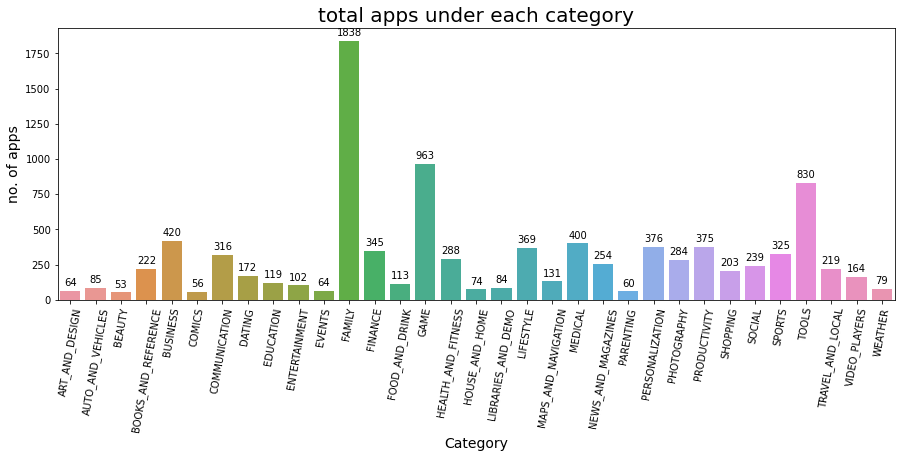

In [ ]:
#plot showing no. of apps under each category
plots = sns.barplot(x = 'Category', y = 'App' , data = total_apps)

plt.title('total apps under each category', size = 20)
plt.xlabel("Category", size=14)
plt.ylabel("no. of apps", size=14)

# Iterrating over the bars one-by-one
for bar in plots.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.savefig("add_annotation_to_bars_in_barplot_Seaborn_Python.png")
plt.xticks(rotation=80)
plt.show()

Here we can conclude the top 5 cateories on the basis of number of apps :

1. Family (1838)    

2. Game         (963)

3. Tools          (830)

4. Business       (420)

5. Medical (400)

2. Total numbers of apps of different types (free, paid)

In [ ]:
types_data =  df.groupby('Type')['App'].count().reset_index().rename(columns = {'App' : 'Total_count'})

In [ ]:
types_data

,Type,Total_count
0,Free,8930
1,Paid,756


In [ ]:
a = types_data['Type']
b = types_data['Total_count']

In [ ]:
plt.rcParams['figure.figsize'] = [10,6]

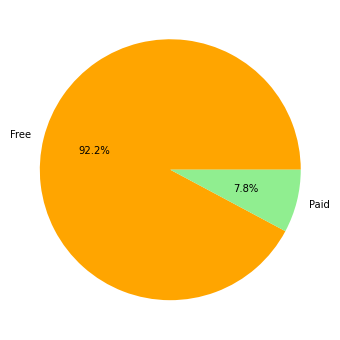

In [ ]:
label = ['Free','Paid']
plt.pie(types_data.Total_count, labels = label, autopct = '%1.1f%%', colors = ['orange','lightgreen'])
plt.show()

Here it show a mass number of apps are free to use

In [ ]:
plot = df.groupby(['Category','Type'], as_index= False)['App'].count()  
free = plot[plot['Type'] == 'Free'].loc[:,['Type','App']].reset_index()
free.drop('index',axis = 1, inplace = True)
paid = plot[plot['Type'] == 'Paid'].loc[:,['Type','App']].reset_index()
paid.drop('index',axis = 1, inplace = True)
categories =  plot['Category'].unique()
a = free['App']
b = paid['App']


In [ ]:
new_dict = {'Category':categories,'Free':a, 'Paid':b}

In [ ]:
fin_df = pd.DataFrame(new_dict)

In [ ]:
fin_df

,Category,Free,Paid
0,ART_AND_DESIGN,61.0,3.0
1,AUTO_AND_VEHICLES,82.0,3.0
2,BEAUTY,53.0,NaN
3,BOOKS_AND_REFERENCE,194.0,28.0
4,BUSINESS,408.0,12.0
5,COMICS,56.0,NaN
6,COMMUNICATION,289.0,27.0
7,DATING,166.0,6.0
8,EDUCATION,115.0,4.0
9,ENTERTAINMENT,100.0,2.0


In [ ]:
plt.rcParams['figure.figsize'] = [20,6]

In [ ]:
X =  fin_df['Content_Rating']

count = fin_df['count']
installs = fin_df['installs']

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.25, Free, 0.5, label = 'count')
plt.bar(X_axis + 0.25, Paid, 0.5, label = 'installs')

plt.xticks(X_axis, X)

plt.xlabel('Content_Rating',fontsize = 15, color = 'b')
plt.ylabel('count',fontsize = 15, color = 'b')
plt.title('Type of Apps in diff. Categories',fontsize = 25, color = 'b')

 
plt.xticks(rotation = 80)
plt.legend()
plt.show()

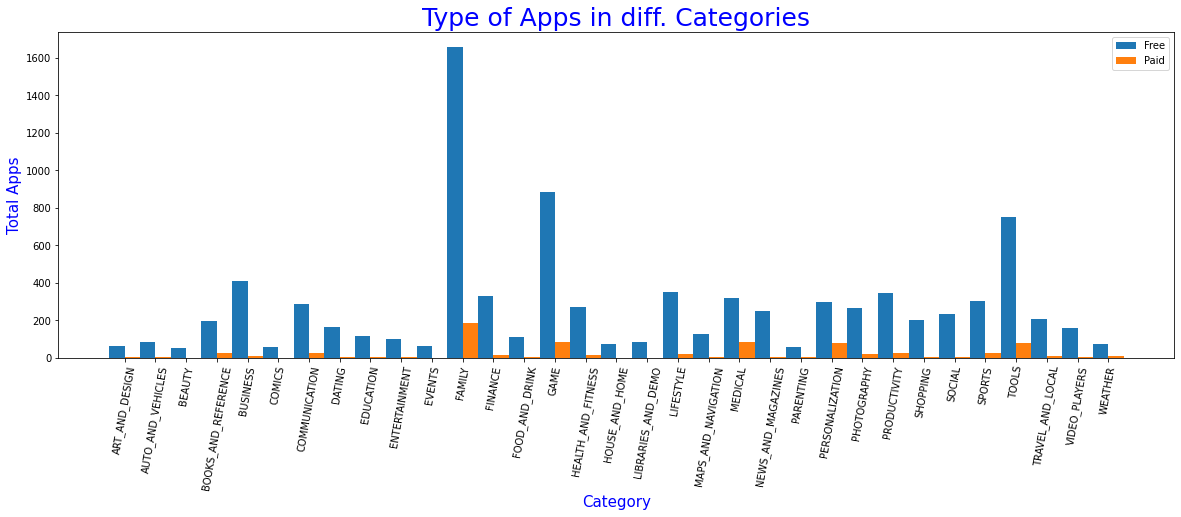

In [ ]:
X =  fin_df['Category']

Free = fin_df['Free']
Paid = fin_df['Paid']

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.25, Free, 0.5, label = 'Free')
plt.bar(X_axis + 0.25, Paid, 0.5, label = 'Paid')

plt.xticks(X_axis, X)

plt.xlabel('Category',fontsize = 15, color = 'b')
plt.ylabel('Total Apps',fontsize = 15, color = 'b')
plt.title('Type of Apps in diff. Categories',fontsize = 25, color = 'b')

 
plt.xticks(rotation = 80)
plt.legend()
plt.show()

Here we can coclude that Free apps are mostly preffered in each category 

top 5 categories having maximum number of installs

In [ ]:
total_installs_per_category = df.groupby('Category')['Installs'].sum().sort_values(ascending = False)

In [ ]:
top_5_category_max_installs = total_installs_per_category.iloc[0:5]

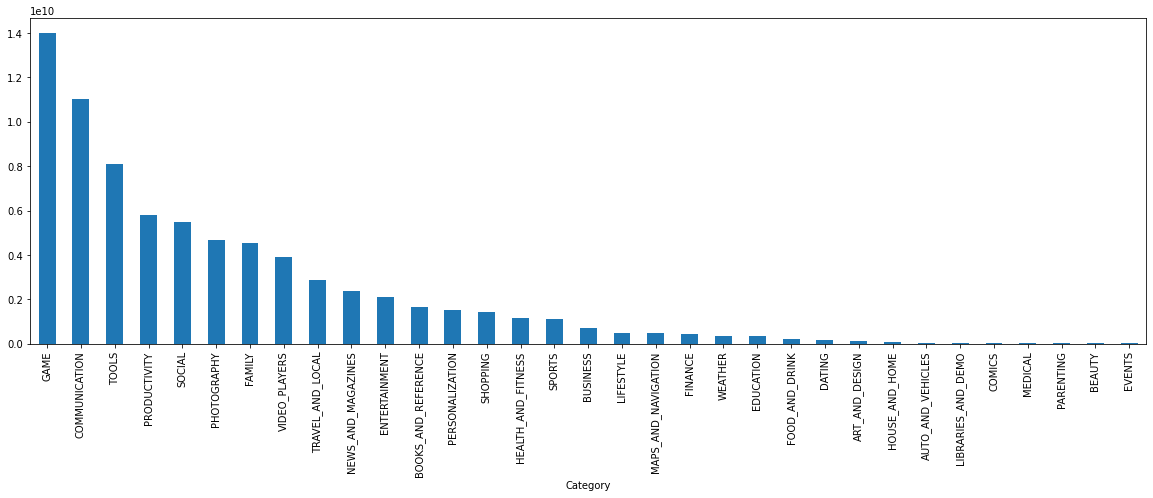

In [ ]:
total_installs_per_category.plot(kind  = 'bar')
plt.show()

In [ ]:
top_5_category_max_installs = pd.DataFrame(top_5_category_max_installs).reset_index()

In [ ]:
top_5_category_max_installs

,Category,Installs
0,GAME,13993924415
1,COMMUNICATION,11039276251
2,TOOLS,8112771915
3,PRODUCTIVITY,5803091369
4,SOCIAL,5487867902


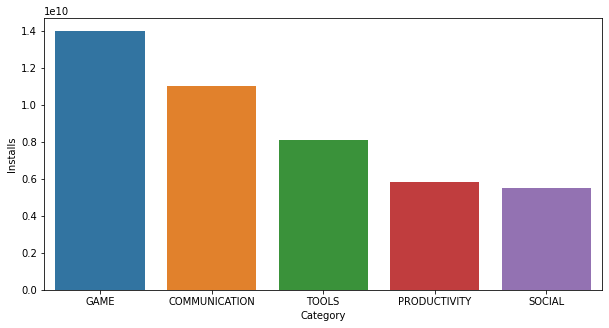

In [ ]:
plt.rcParams['figure.figsize'] = [10,5]
sns.barplot(x = 'Category',y = 'Installs', data  = top_5_category_max_installs )
plt.show()

Here we can conclude the top 5 categories having high number of users : 

1. Game

2. Communication

3. Social

4. Productivity

5. Tools

# Content Rating plot

In [ ]:
counts_of_diff_cont_ratings = df.groupby('Content Rating').size().reset_index(name = 'Count')

In [ ]:
counts_of_diff_cont_ratings

,Content Rating,Count
0,Everyone,7930
1,Everyone 10+,322
2,Mature,397
3,Teen,1037


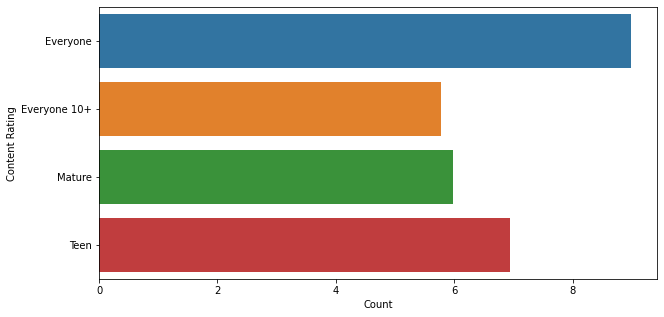

In [ ]:
sns.barplot(x = np.log(counts_of_diff_cont_ratings['Count']),y = 'Content Rating', data = counts_of_diff_cont_ratings)
plt.show()

In [ ]:
cont_rat_installs_rela = df.groupby('Content Rating')['Installs'].sum().reset_index(name = 'total_installs')

In [ ]:
cont_rat_installs_rela 

,Content Rating,total_installs
0,Everyone,52569715461
1,Everyone 10+,4016271795
2,Mature,2449986878
3,Teen,16537275393


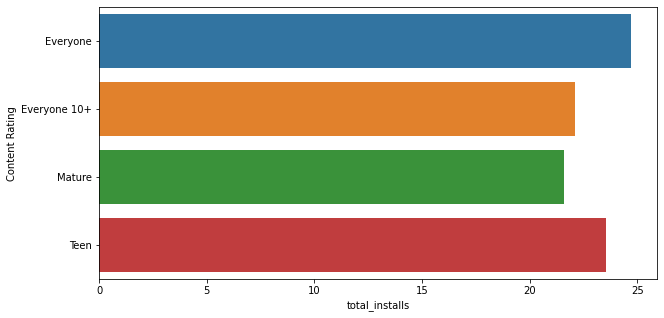

In [ ]:
sns.barplot(x = np.log(cont_rat_installs_rela ['total_installs']), y = 'Content Rating', data = cont_rat_installs_rela)
plt.show()

above two visualization shows that 

Content Rating 'Everyone' have higher number of apps and users



In [ ]:
# higher number of reviews
review_data  = df.groupby('Category')['Reviews'].sum().sort_values(ascending = False).reset_index()

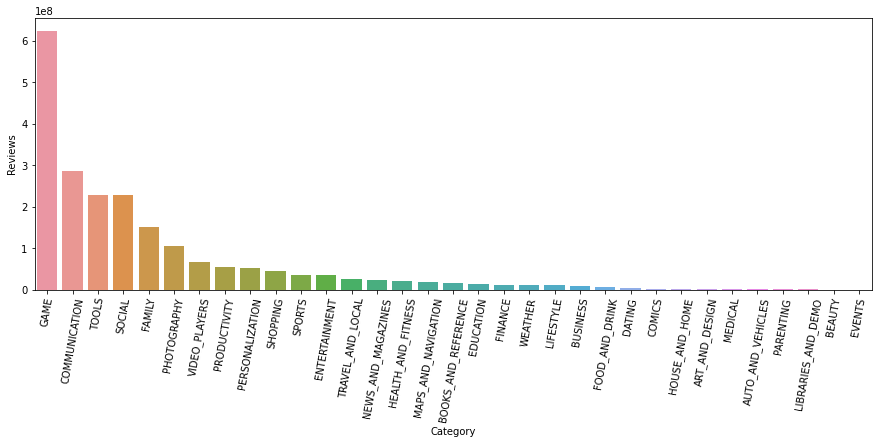

In [ ]:
plt.rcParams['figure.figsize'] = (15,5)
sns.barplot(x = 'Category',y = 'Reviews', data = review_data)
plt.xticks(rotation = 80)
plt.show()

Here we can conclude the number of reviews in each category of apps

Top 5 Categories : 

GAME > COMMUNICATION > SOCIAL > FAMILY > TOOLS

## finding correlation of features (RATING, INSTALLS, SIZE, PRICE , REVIEWS)


In [ ]:
numeric_data = df.select_dtypes(include = np.number)

In [ ]:
numeric_data.head()

,Rating,Reviews,Installs,Price,days_ago_updated
0,4.1,159,10000,0.0,1302
1,3.9,967,500000,0.0,1294
2,4.7,87510,5000000,0.0,1096
3,4.5,215644,50000000,0.0,1150
4,4.3,967,100000,0.0,1138


# size frequency

In [ ]:
df.loc[df['Size'] != 'Varies with device','Size'].min()

0.01

In [ ]:
r0 = []
r1 = []
r2 = []
r3 = []
r4 = []
r5 = []
for i in df['Size'] :
  if type(i) == float:
    if 0<= i < 20 :
      r1.append(i)
    elif 20<= i < 40 :
      r2.append(i)
    elif 40<= i < 60 :
      r3.append(i)
    elif 60 <= i < 80 :
      r4.append(i)
    else :
      r5.append(i)
  else :
    r0.append(i)


list_size = [len(r1),len(r2),len(r3),len(r4),len(r5),len(r0)] 
size_dict = {'size_range_in_mb' : ['0 - 20','20 - 40','40 - 60','60 - 80','above 80','Varies with Device'],'frequency' : list_size}

size_df = pd.DataFrame(size_dict)

In [ ]:
for i in df.iterrows():
  print(i)

NameError: ignored

In [ ]:
ax = size_df.set_index('size_range_in_mb')

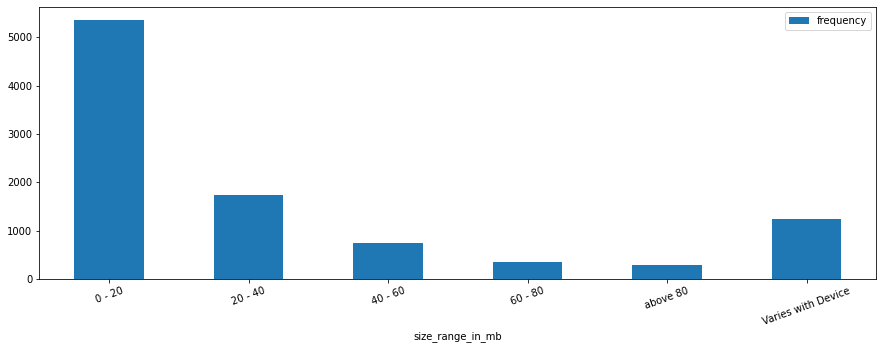

In [ ]:
ax.plot(kind = 'bar')
plt.xticks(rotation = 20)
plt.show()

# Bivariate Analysis

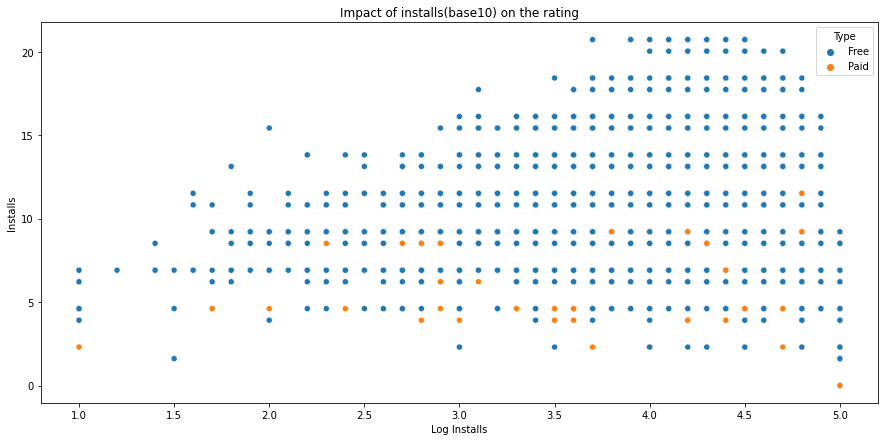

In [ ]:
# scatter plot b/w install and rating 
plt.figure(figsize=(15,7))
plt.title("Impact of installs(base10) on the rating")
sns.scatterplot(df['Rating'],np.log(df['Installs']), hue=df['Type'])
plt.xlabel("Log Installs")
plt.show()

Conclusion :

most of the users generally prefer to download those apps having rating greather than 3.5.

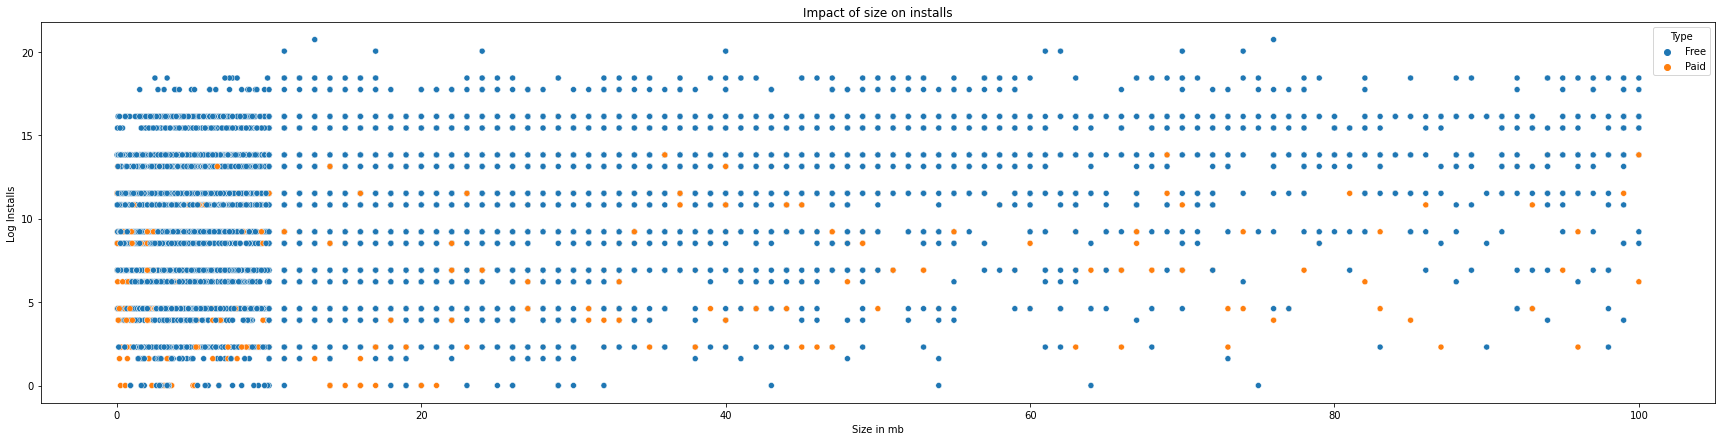

In [ ]:
# scatter plot to get the relation between size and number of installs for free and paid apps
plt.figure(figsize=(30,7))
plt.title("Impact of size on installs")
sns.scatterplot(df.loc[df['Size'] != 'Varies with device','Size'],np.log(df['Installs']), hue=df['Type'])
plt.ylabel("Log Installs")
plt.xlabel("Size in mb")
plt.show()

Conclusion :
1. Size of an app is not impacting the number of installs. 
2. For a given number of installs,there are more apps in the size range of 10mb as compared to other size values.

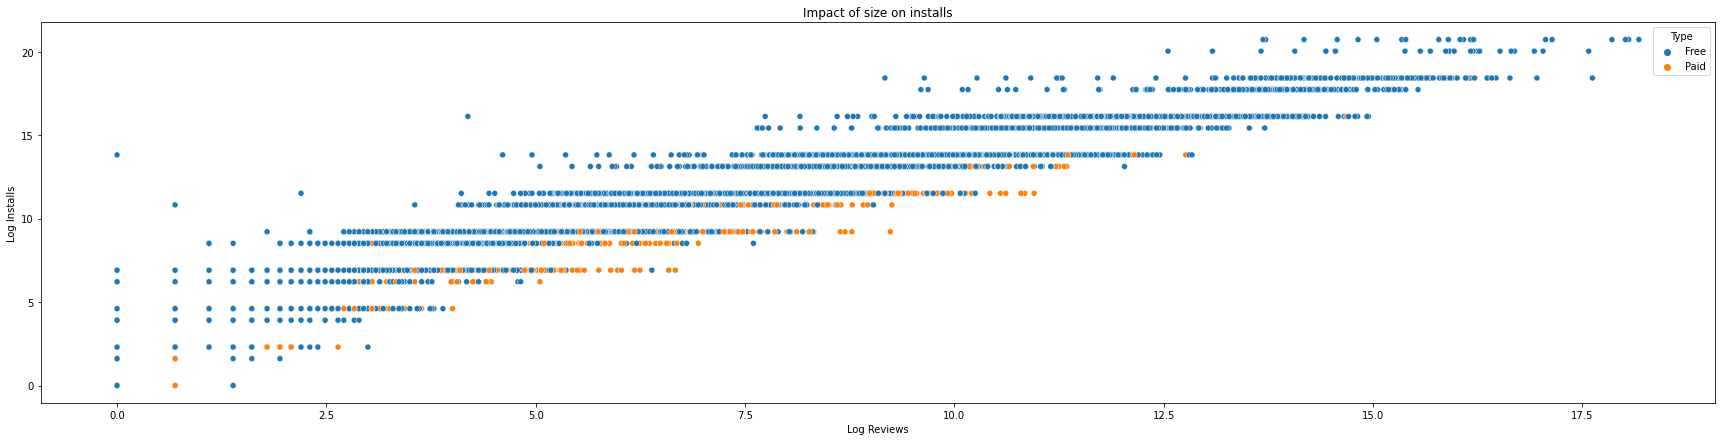

In [ ]:
plt.figure(figsize=(30,7))
plt.title("Impact of size on installs")
sns.scatterplot(np.log(df['Reviews']), np.log(df['Installs']), hue=df['Type'])
plt.ylabel("Log Installs")
plt.xlabel("Log Reviews")
plt.show()

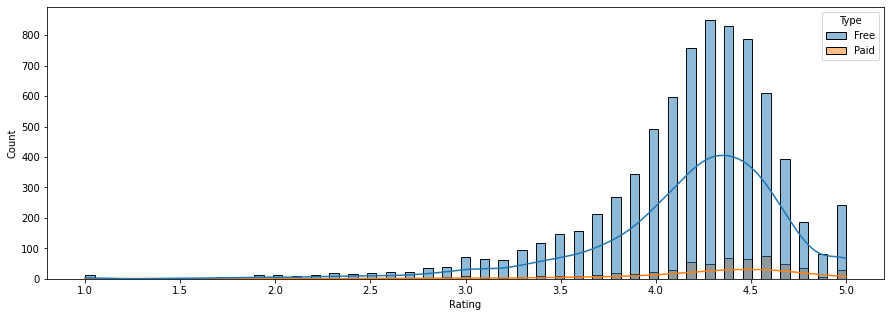

In [ ]:
# distribution of rating
plt.figure(figsize=(15,5))
sns.histplot(x='Rating',hue='Type',data=df,kde=True)
plt.show()

Conclusion :

most of the apps are lying in the range of rating  4 to 4.7

review_data

In [ ]:
merged_df = pd.merge(df[['App','Category','Reviews','Rating','Size','Installs','Price','Type']],rdf)

In [ ]:
merged_df.head(2)

,App,Category,Reviews,Rating,Size,Installs,Price,Type,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,967,3.9,14,500000,0.0,Free,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,967,3.9,14,500000,0.0,Free,It bad >:(,Negative,-0.725,0.833333


In [ ]:
cat_sentiments = merged_df.groupby(['Category','Sentiment']).size().reset_index(name = 'sentiments_count')

In [ ]:
cat_sentiments.head()

,Category,Sentiment,sentiments_count
0,ART_AND_DESIGN,Negative,61
1,ART_AND_DESIGN,Neutral,62
2,ART_AND_DESIGN,Positive,259
3,AUTO_AND_VEHICLES,Negative,17
4,AUTO_AND_VEHICLES,Neutral,36


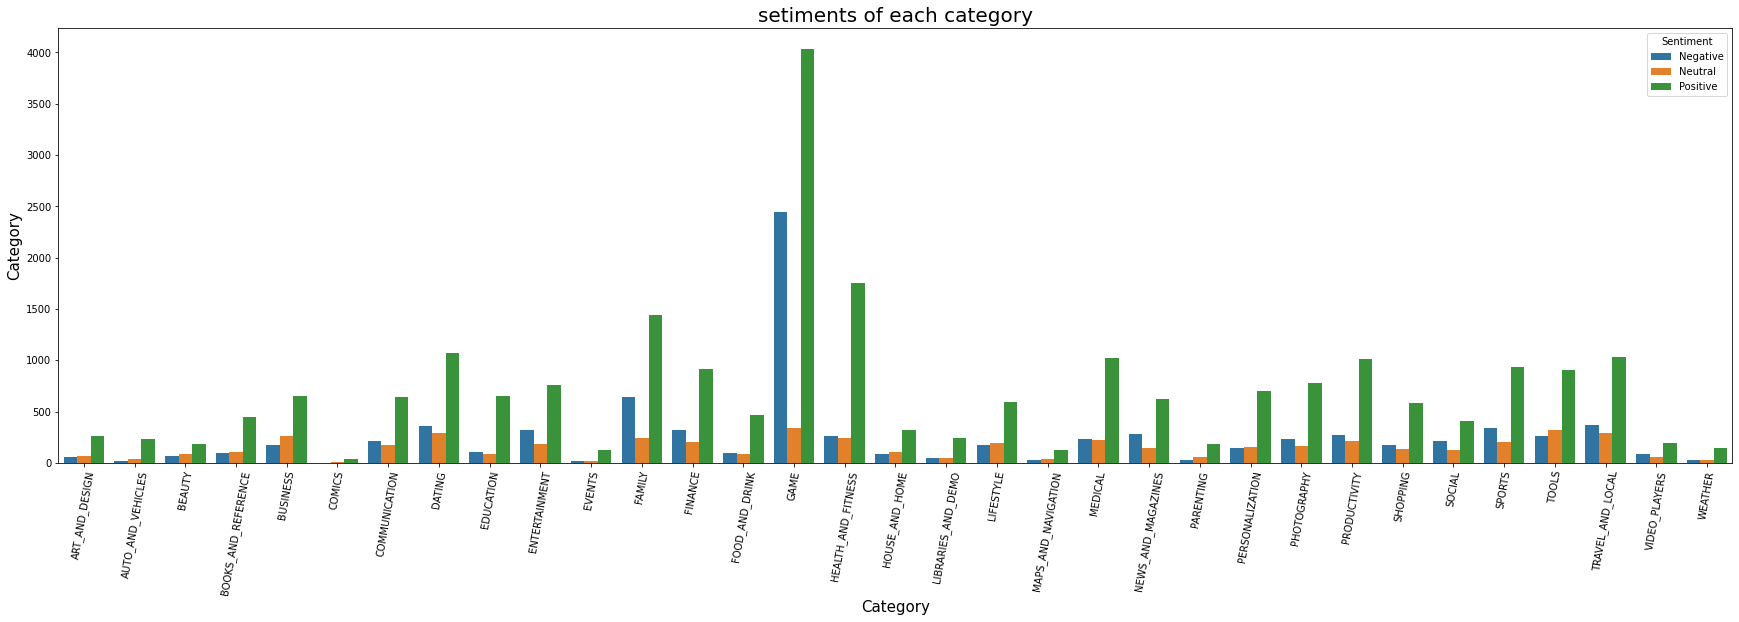

In [ ]:
plt.rcParams['figure.figsize'] = (30,8)
sns.barplot('Category','sentiments_count', data = cat_sentiments, hue = 'Sentiment')
plt.xlabel('Category', fontsize = 15)
plt.ylabel('sentiment_counts', fontsize = 15)
plt.title('setiments of each category', fontsize = 20)
plt.xticks(rotation = 80)
plt.show()

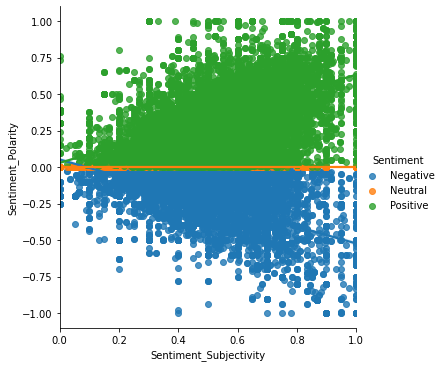

In [ ]:
sns.lmplot(x = 'Sentiment_Subjectivity', y = 'Sentiment_Polarity', data = merged_df, hue = 'Sentiment')

In [ ]:
#len(rdf[(rdf['Sentiment'] == 'Neutral') & (rdf['Sentiment_Polarity'] == 0.0) & (rdf['Sentiment_Subjectivity'] == 0.0)])

In [ ]:
#rdf[(rdf['Sentiment'] == 'Neutral') & (rdf['Sentiment_Polarity'] == 0.0) & (rdf['Sentiment_Subjectivity'] == 0.0) & (rdf['App'] == '11st')]

In [ ]:
#rdf[(rdf['Sentiment'] == 'Neutral') & (rdf['Sentiment_Polarity'] == 0.0) & (rdf['Sentiment_Subjectivity'] == 0.0) & (rdf['App'] == 'Birds Sounds Ringtones & Wallpapers')]

In [ ]:
#rdf[(rdf['Sentiment'] == 'Neutral') & (rdf['Sentiment_Polarity'] == 0.0) & (rdf['Sentiment_Subjectivity'] == 0.0) & (rdf['App'] == 'Calorie Counter - MyFitnessPal')]

In [ ]:
#rdf[(rdf['Sentiment'] == 'Neutral') & (rdf['Sentiment_Polarity'] == 0.0) & (rdf['Sentiment_Subjectivity'] == 0.0) & (rdf['App'] == 'DC Comics')]

In [ ]:
#rdf[(rdf['Sentiment'] == 'Neutral') & (rdf['Sentiment_Polarity'] == 0.0) & (rdf['Sentiment_Subjectivity'] == 0.0) & (rdf['App'] == 'Garden Photo Frames - Garden Photo Editor')]

# Multivariate Analysis

In [ ]:
mv_analysis_df = df.copy()

In [ ]:
mv_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   App               9686 non-null   object        
 1   Category          9686 non-null   object        
 2   Rating            8222 non-null   float64       
 3   Reviews           9686 non-null   int64         
 4   Size              9686 non-null   object        
 5   Installs          9686 non-null   int64         
 6   Type              9686 non-null   category      
 7   Price             9686 non-null   float64       
 8   Content Rating    9686 non-null   category      
 9   Genres            9686 non-null   object        
 10  Last Updated      9686 non-null   datetime64[ns]
 11  Current Ver       9678 non-null   object        
 12  Android Ver       9684 non-null   object        
 13  days_ago_updated  9686 non-null   int64         
dtypes: category(2), datetime

In [ ]:
mv_analysis_df.shape

(9686, 14)

In [ ]:
mv_analysis_df['Size'] = pd.to_numeric(mv_analysis_df['Size'],errors='coerce')


In [ ]:
mv_analysis_df[mv_analysis_df['Size'] == 'Varies with device'].shape

(0, 14)

In [ ]:
mv_analysis_df.shape

(9686, 14)

In [ ]:
mv_analysis_df['Size'].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 2.70e+00, 5.50e+00, 1.70e+01, 3.90e+01,
       3.10e+01, 4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01,      nan,
       9.40e+00, 1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00,
       7.90e+00, 5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 2.00e-01,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.50e+00,
       1.60e+01, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01,
       3.20e+01, 5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+01, 7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e

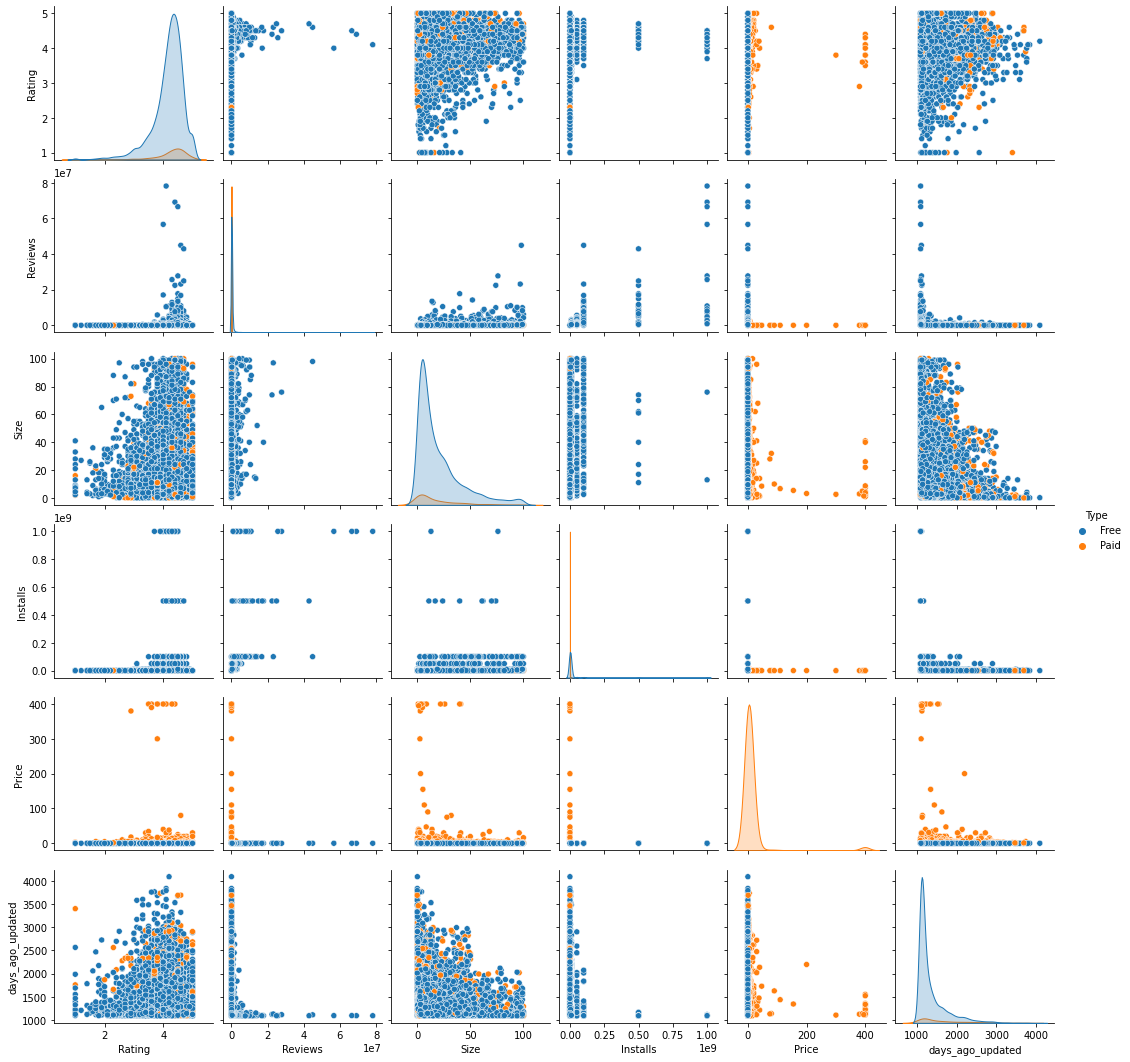

In [ ]:
sns.pairplot(mv_analysis_df, hue='Type')
plt.show()

# Correlation

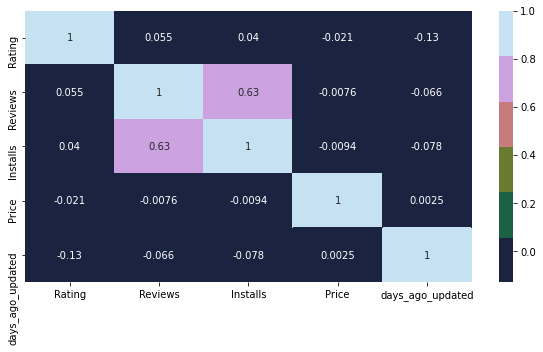

In [ ]:
plt.rcParams['figure.figsize'] = [10,5]
correlations = numeric_data.corr()

colour = sns.color_palette('cubehelix')
sns.heatmap(correlations, cmap = colour, annot = True)
plt.show()

In [ ]:
correlations

,Rating,Reviews,Installs,Price,days_ago_updated
Rating,1.000000,0.055212,0.040321,-0.021194,-0.130266
Reviews,0.055212,1.000000,0.625163,-0.007614,-0.066000
Installs,0.040321,0.625163,1.000000,-0.009431,-0.078072
Price,-0.021194,-0.007614,-0.009431,1.000000,0.002487
days_ago_updated,-0.130266,-0.066000,-0.078072,0.002487,1.000000


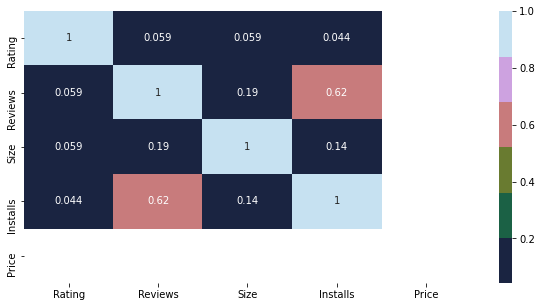

In [ ]:
free_correlation = mv_analysis_df[mv_analysis_df["Type"]=="Free"][['Rating','Reviews','Size','Installs','Price']].corr()
colour = sns.color_palette('cubehelix')
sns.heatmap(free_correlation,annot=True, cmap = colour)
plt.show()

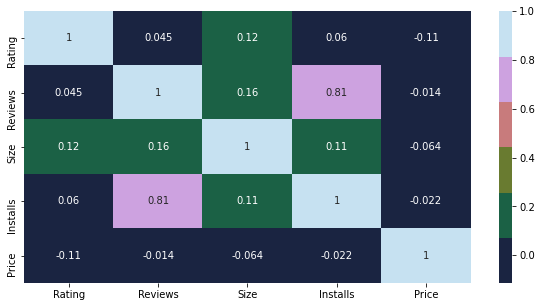

In [ ]:
free_correlation = mv_analysis_df[mv_analysis_df['Type']=="Paid"][['Rating','Reviews','Size','Installs','Price']].corr()
colour = sns.color_palette('cubehelix')
sns.heatmap(free_correlation,annot=True, cmap = colour)
plt.show()

# From the above three heatmaps,we observe that:

Installs and Reviews corr=0.63   

Installs and Reviews corr for free apps=0.62

Installs and Reviews corr for paid apps=**0.81**

All other remaining features have negligible correlation

# identifying categories having best features and top venture opportunity